In [57]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks

# Hierarchicalclu stering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# import all machine learning libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
# from numpy.random import uniform
# from math import isnan

# import warnings
import warnings
warnings.filterwarnings('ignore')

import datasist as ds

In [56]:
data = pd.read_csv("Inequality in Education Africa.csv")
data.head()

KeyboardInterrupt: 

In [47]:
display(data.describe(include=[object, pd.Categorical]).T)

ds.structdata.describe(data)


,count,unique,top,freq
ISO3,54,54,AGO,1
Country,54,54,Angola,1
Human Development Groups,53,4,Low,28
UNDP Developing Regions,54,2,SSA,46
continent,54,1,Africa,54


First five data points


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),continent
0,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,Africa
1,BDI,Burundi,Low,SSA,187.0,40.970000,40.970000,36.868090,36.868090,36.868090,36.868090,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210,Africa
2,BEN,Benin,Low,SSA,166.0,NaN,44.792260,44.792260,44.792260,43.656390,43.656390,43.656390,43.693550,43.693550,43.693550,43.693550,43.693550,Africa
3,BFA,Burkina Faso,Low,SSA,184.0,20.966409,20.966409,20.966409,20.966409,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,Africa
4,BWA,Botswana,Medium,SSA,117.0,32.082000,32.082000,32.082000,32.082000,32.082000,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,Africa




Random five data points


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),continent
38,SDN,Sudan,Low,AS,172.0,42.67139,42.67139,42.67139,42.67139,42.45021,42.45021,42.45021,42.45021,42.45021,42.45021,42.45021,42.45021,Africa
19,GIN,Guinea,Low,SSA,182.0,42.00000,42.00000,48.26536,48.26536,48.26536,48.26536,48.26536,48.26536,50.12411,50.12411,50.12411,50.12411,Africa
43,STP,Sao Tome and Principe,Medium,SSA,138.0,19.99200,19.99200,19.99200,19.99200,18.30533,18.30533,18.30533,18.30533,18.30533,18.69702,18.69702,18.69702,Africa
48,TUN,Tunisia,High,AS,97.0,NaN,NaN,34.57692,34.57692,34.57692,34.57692,34.57692,34.57692,30.70285,30.70285,30.70285,30.70285,Africa
2,BEN,Benin,Low,SSA,166.0,NaN,44.79226,44.79226,44.79226,43.65639,43.65639,43.65639,43.69355,43.69355,43.69355,43.69355,43.69355,Africa




Last five data points


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),continent
49,TZA,Tanzania,Low,SSA,160.0,29.500,29.50000,28.49972,28.49972,28.49972,28.49972,26.96013,26.96013,26.96013,26.96013,26.96013,26.96013,Africa
50,UGA,Uganda,Low,SSA,166.0,32.200,29.37211,29.37211,29.37211,29.37211,29.37211,27.91438,27.91438,27.91438,27.91438,27.91438,27.91438,Africa
51,ZAF,South Africa,High,SSA,109.0,NaN,NaN,16.06077,16.06077,16.06077,14.26559,17.29413,17.29413,17.29413,17.29413,17.29413,17.29413,Africa
52,ZMB,Zambia,Medium,SSA,154.0,23.760,23.76000,23.76000,23.76000,21.73491,21.73491,21.73491,21.73491,20.43572,20.43572,20.43572,20.43572,Africa
53,ZWE,Zimbabwe,Medium,SSA,146.0,17.825,17.82500,17.82500,17.82500,17.39521,16.80576,16.80576,16.80576,16.80576,14.60503,14.60503,14.60503,Africa




Shape of  data set: (54, 18)


Size of  data set: 972


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
ISO3,object
Country,object
Human Development Groups,object
UNDP Developing Regions,object
HDI Rank (2021),float64
Inequality in Education (2010),float64
Inequality in Education (2011),float64
Inequality in Education (2012),float64
Inequality in Education (2013),float64
Inequality in Education (2014),float64




Numerical Features in Data set
['HDI Rank (2021)', 'Inequality in Education (2010)', 'Inequality in Education (2011)', 'Inequality in Education (2012)', 'Inequality in Education (2013)', 'Inequality in Education (2014)', 'Inequality in Education (2015)', 'Inequality in Education (2016)', 'Inequality in Education (2017)', 'Inequality in Education (2018)', 'Inequality in Education (2019)', 'Inequality in Education (2020)', 'Inequality in Education (2021)']


Categorical Features in Data set


['ISO3',
 'Country',
 'Human Development Groups',
 'UNDP Developing Regions',
 'continent']



Statistical Description of Columns


,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
count,53.000000,36.000000,39.000000,42.000000,45.000000,45.000000,47.000000,47.000000,47.000000,48.000000,49.000000,49.000000,49.000000
mean,153.132075,35.159143,34.778685,33.902994,34.190573,34.159310,34.036906,34.059790,34.020684,33.895281,33.323145,33.312547,33.312547
std,31.567411,8.800437,8.773174,9.230572,9.126734,9.335806,9.563948,9.500774,9.456102,9.561516,10.324443,10.373849,10.373849
min,63.000000,17.825000,17.825000,16.060770,16.060770,16.060770,14.265590,16.805760,16.805760,16.805760,6.656480,6.656480,6.656480
25%,139.000000,28.988250,28.568555,27.052770,26.815360,27.690550,26.201631,25.987900,25.892570,26.331020,25.015670,25.015670,25.015670
50%,162.000000,36.712050,34.549600,34.563260,34.576920,34.924850,34.924850,34.924850,34.964830,34.757215,34.964830,34.964830,34.964830
75%,176.000000,42.212848,42.335695,41.592085,41.861060,41.910020,42.660560,42.660560,42.180115,42.045068,42.087040,42.119680,42.119680
max,191.000000,48.723000,48.723000,48.723000,49.321290,49.321290,49.321290,49.321290,49.321290,50.124110,50.124110,50.124110,50.124110




Description of Categorical Features


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [48]:
data.isna().sum()


ISO3                               0
Country                            0
Human Development Groups           1
UNDP Developing Regions            0
HDI Rank (2021)                    1
Inequality in Education (2010)    18
Inequality in Education (2011)    15
Inequality in Education (2012)    12
Inequality in Education (2013)     9
Inequality in Education (2014)     9
Inequality in Education (2015)     7
Inequality in Education (2016)     7
Inequality in Education (2017)     7
Inequality in Education (2018)     6
Inequality in Education (2019)     5
Inequality in Education (2020)     5
Inequality in Education (2021)     5
continent                          0
dtype: int64

In [49]:
data.dropna(inplace=True)

In [50]:
data.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),continent
1,BDI,Burundi,Low,SSA,187.0,40.970000,40.970000,36.868090,36.868090,36.868090,36.868090,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210,Africa
3,BFA,Burkina Faso,Low,SSA,184.0,20.966409,20.966409,20.966409,20.966409,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,Africa
4,BWA,Botswana,Medium,SSA,117.0,32.082000,32.082000,32.082000,32.082000,32.082000,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,Africa
5,CAF,Central African Republic,Low,SSA,188.0,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850,Africa
6,CIV,Ivory Coast,Medium,SSA,159.0,43.200000,43.200000,45.111420,45.111420,45.111420,45.111420,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040,Africa


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HDI Rank (2021),33.0,163.030303,21.564561,97.00000,153.00000,166.00000,179.00000,191.00000
Inequality in Education (2010),33.0,34.225344,8.586310,17.82500,27.76500,32.20000,41.86106,48.72300
Inequality in Education (2011),33.0,33.975005,8.514701,17.82500,27.76500,32.08200,40.97000,48.72300
Inequality in Education (2012),33.0,34.016005,8.847898,17.82500,27.76500,34.54960,40.78516,48.72300
Inequality in Education (2013),33.0,33.713595,8.628667,17.82500,26.81536,34.54960,40.78516,48.26536
Inequality in Education (2014),33.0,33.726622,8.969345,17.39521,27.69055,34.92485,41.86106,48.26536
Inequality in Education (2015),33.0,33.673395,9.258919,16.80576,25.01567,35.01448,41.91002,48.26536
Inequality in Education (2016),33.0,33.639346,9.377547,16.80576,25.01567,35.01448,41.91002,48.26536
Inequality in Education (2017),33.0,33.582525,9.308510,16.80576,25.01567,35.10167,40.78516,48.26536
Inequality in Education (2018),33.0,33.437909,9.641810,16.80576,25.01567,35.10167,40.78516,50.12411


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 53
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO3                            33 non-null     object 
 1   Country                         33 non-null     object 
 2   Human Development Groups        33 non-null     object 
 3   UNDP Developing Regions         33 non-null     object 
 4   HDI Rank (2021)                 33 non-null     float64
 5   Inequality in Education (2010)  33 non-null     float64
 6   Inequality in Education (2011)  33 non-null     float64
 7   Inequality in Education (2012)  33 non-null     float64
 8   Inequality in Education (2013)  33 non-null     float64
 9   Inequality in Education (2014)  33 non-null     float64
 10  Inequality in Education (2015)  33 non-null     float64
 11  Inequality in Education (2016)  33 non-null     float64
 12  Inequality in Education (2017)  33 non-null

In [53]:

columns_drop = ['ISO3', 'UNDP Developing Regions','continent', 'Inequality in Education (2010)','Inequality in Education (2011)',
                'Inequality in Education (2012)','Inequality in Education (2013)','Inequality in Education (2014)','Inequality in Education (2015)',]

data.drop(columns=columns_drop, inplace=True)


In [54]:
data.head()

,Country,Human Development Groups,HDI Rank (2021),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
1,Burundi,Low,187.0,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210
3,Burkina Faso,Low,184.0,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794
4,Botswana,Medium,117.0,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830
5,Central African Republic,Low,188.0,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850
6,Ivory Coast,Medium,159.0,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040


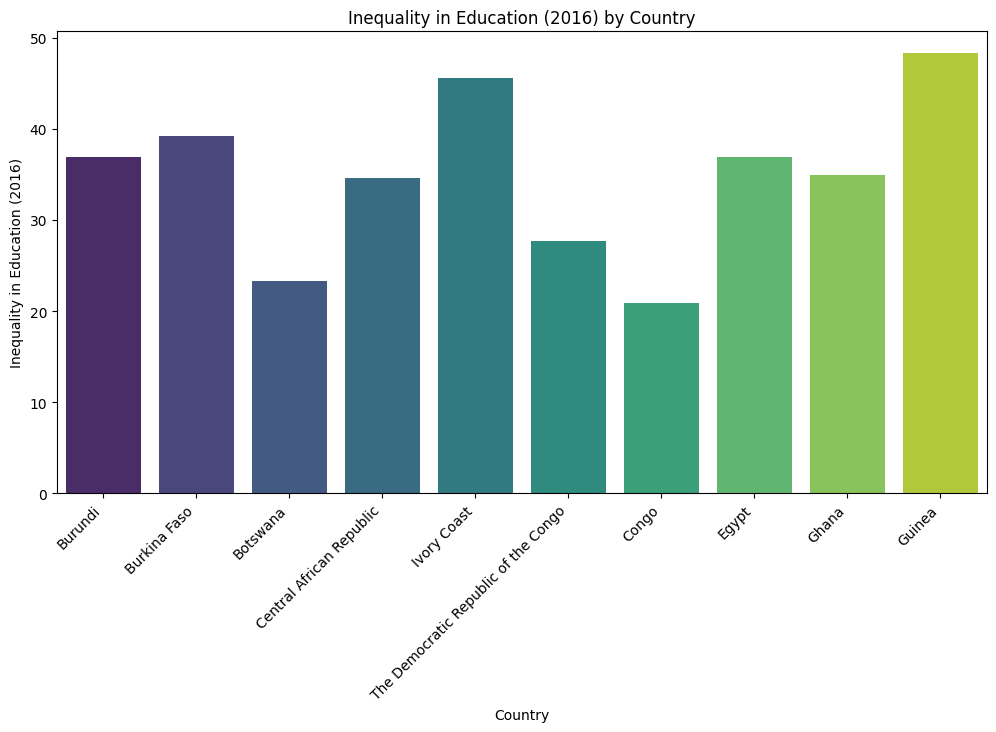

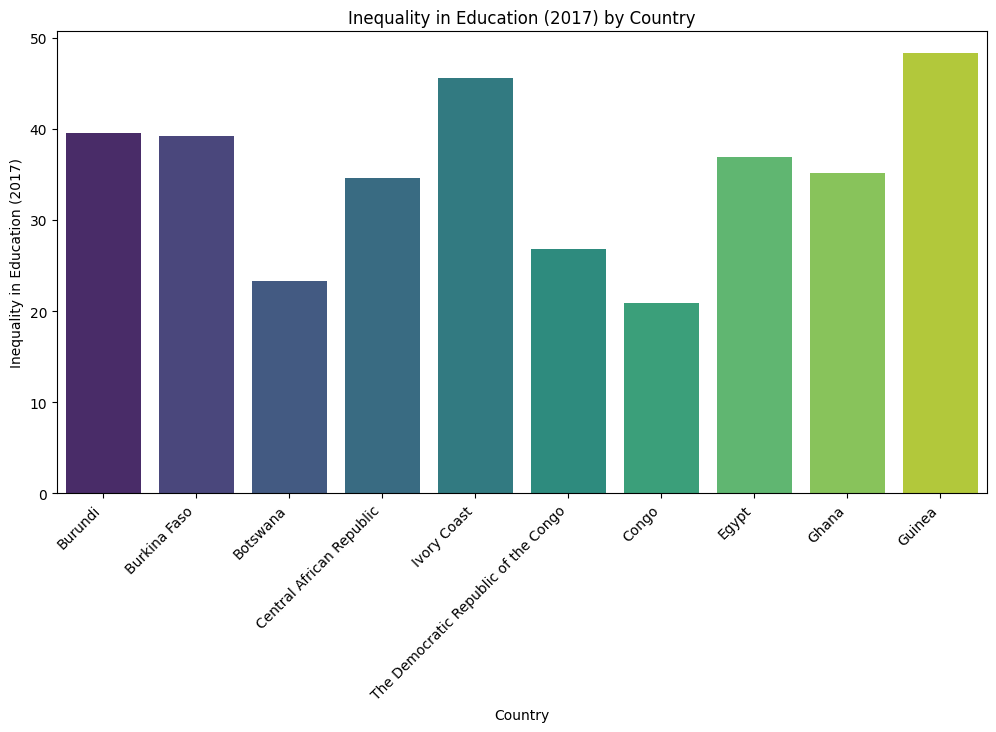

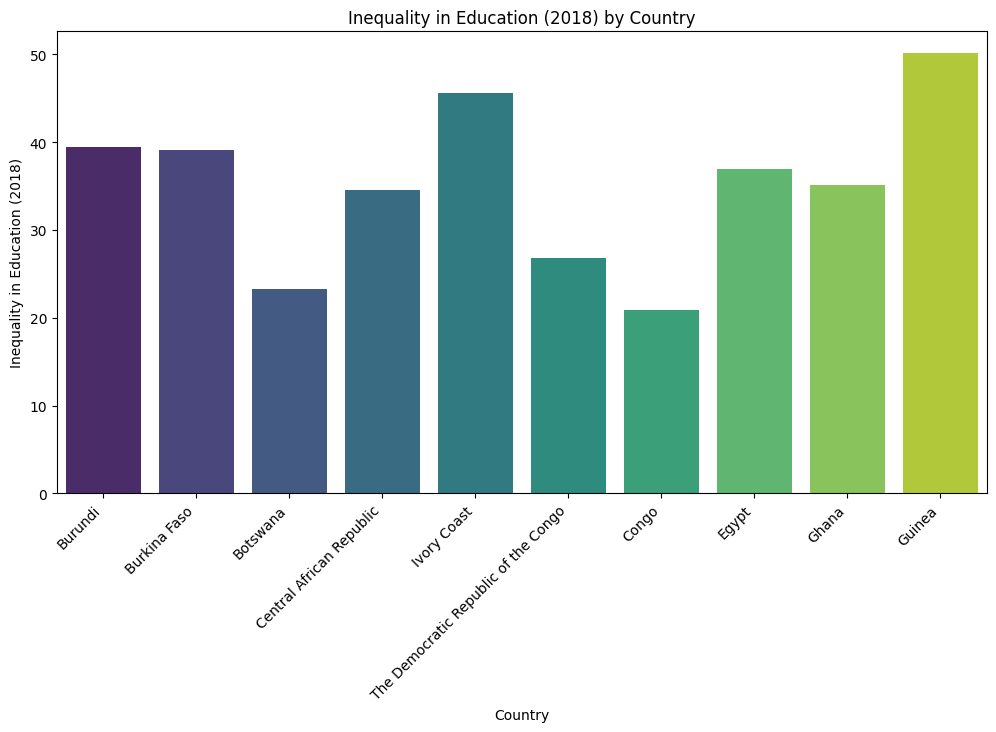

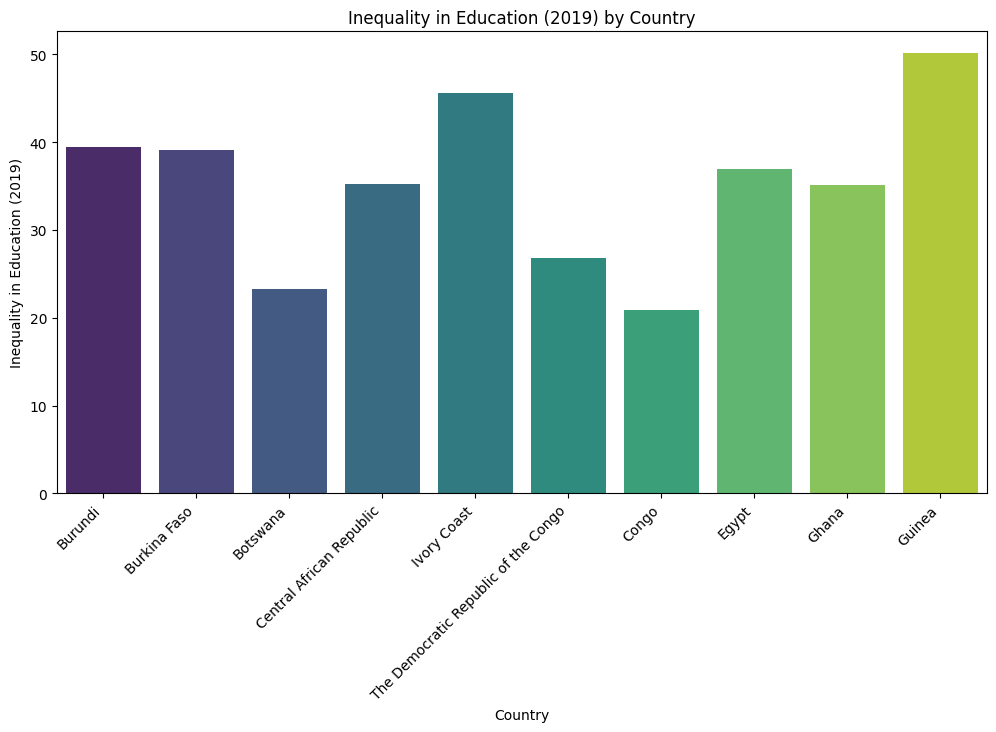

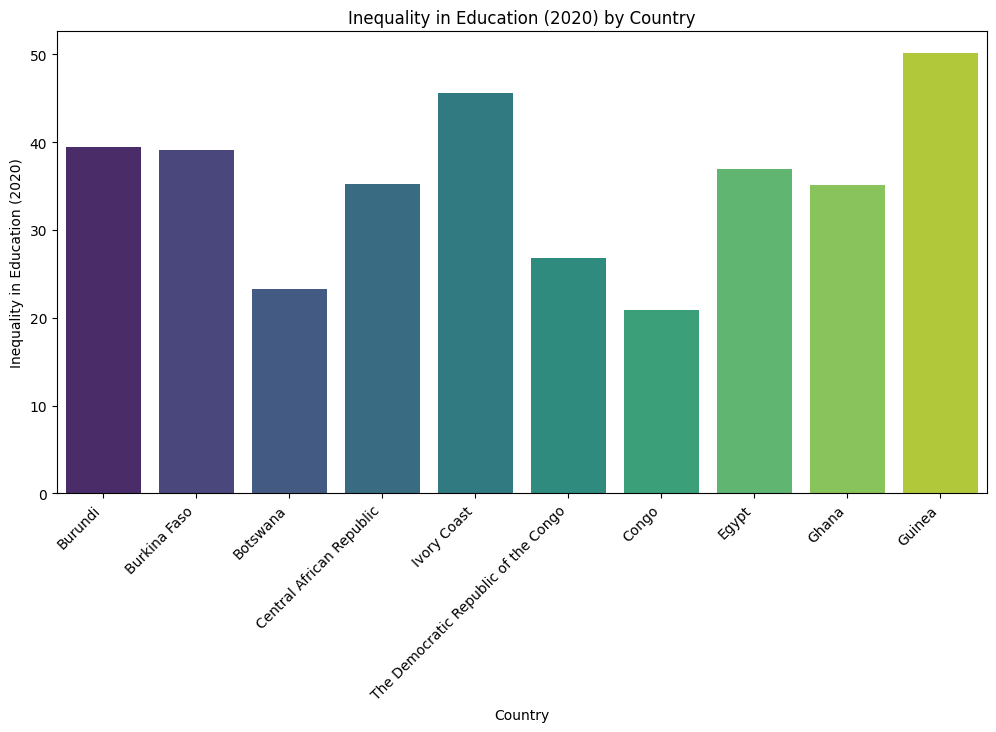

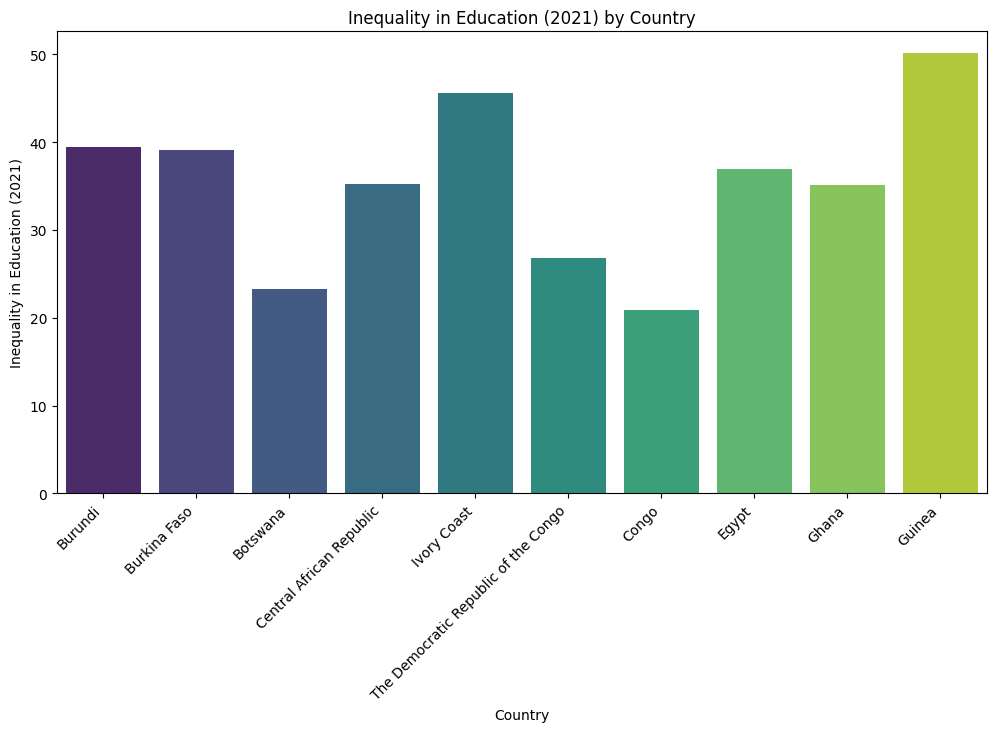

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# 'County' is the column you want to use for the x-axis
# The columns related to inequality in education are specified in 'inequality_columns'
inequality_columns = [
    'Inequality in Education (2016)',
    'Inequality in Education (2017)',
    'Inequality in Education (2018)',
    'Inequality in Education (2019)',
    'Inequality in Education (2020)',
    'Inequality in Education (2021)'
]

# Select the first 10 counties
top_counties = data['Country'].head(10)

# Plot each column against 'County'
for column in inequality_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=column, data=data[data['Country'].isin(top_counties)], palette='viridis')
    plt.title(f'{column} by Country')
    plt.xlabel('Country')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


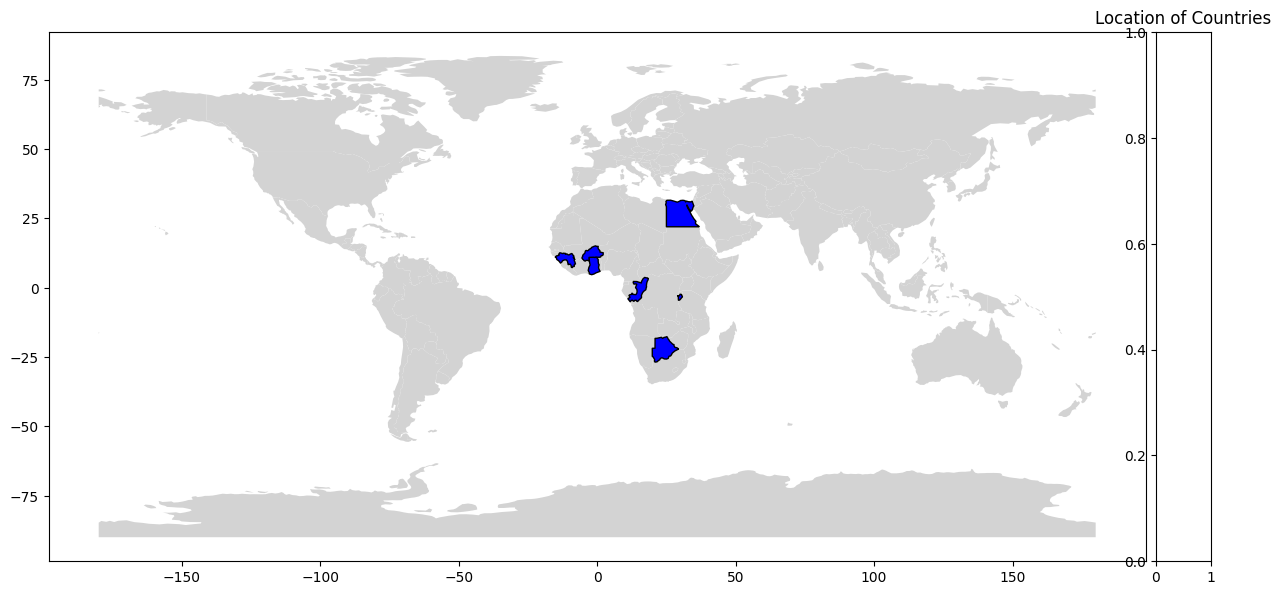

In [15]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assuming 'data' is your DataFrame
# Merge the data with the world dataset based on the country names
merged_data = world.merge(data, left_on='name', right_on='Country', how='left')

# Select the first 10 countries
top_counties = data['Country'].head(10)

# Filter the merged data for the top 10 countries
merged_top_counties = merged_data[merged_data['Country'].isin(top_counties)]

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the world map
world.plot(ax=ax, color='lightgray')

# Plot the top 10 countries on the map
merged_top_counties.plot(ax=ax, color='blue', edgecolor='black', legend=True, cax=cax)

# Set plot title
plt.title('Location of Countries')

# Show the plot
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 53
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         33 non-null     object 
 1   Human Development Groups        33 non-null     object 
 2   HDI Rank (2021)                 33 non-null     float64
 3   Inequality in Education (2016)  33 non-null     float64
 4   Inequality in Education (2017)  33 non-null     float64
 5   Inequality in Education (2018)  33 non-null     float64
 6   Inequality in Education (2019)  33 non-null     float64
 7   Inequality in Education (2020)  33 non-null     float64
 8   Inequality in Education (2021)  33 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.6+ KB


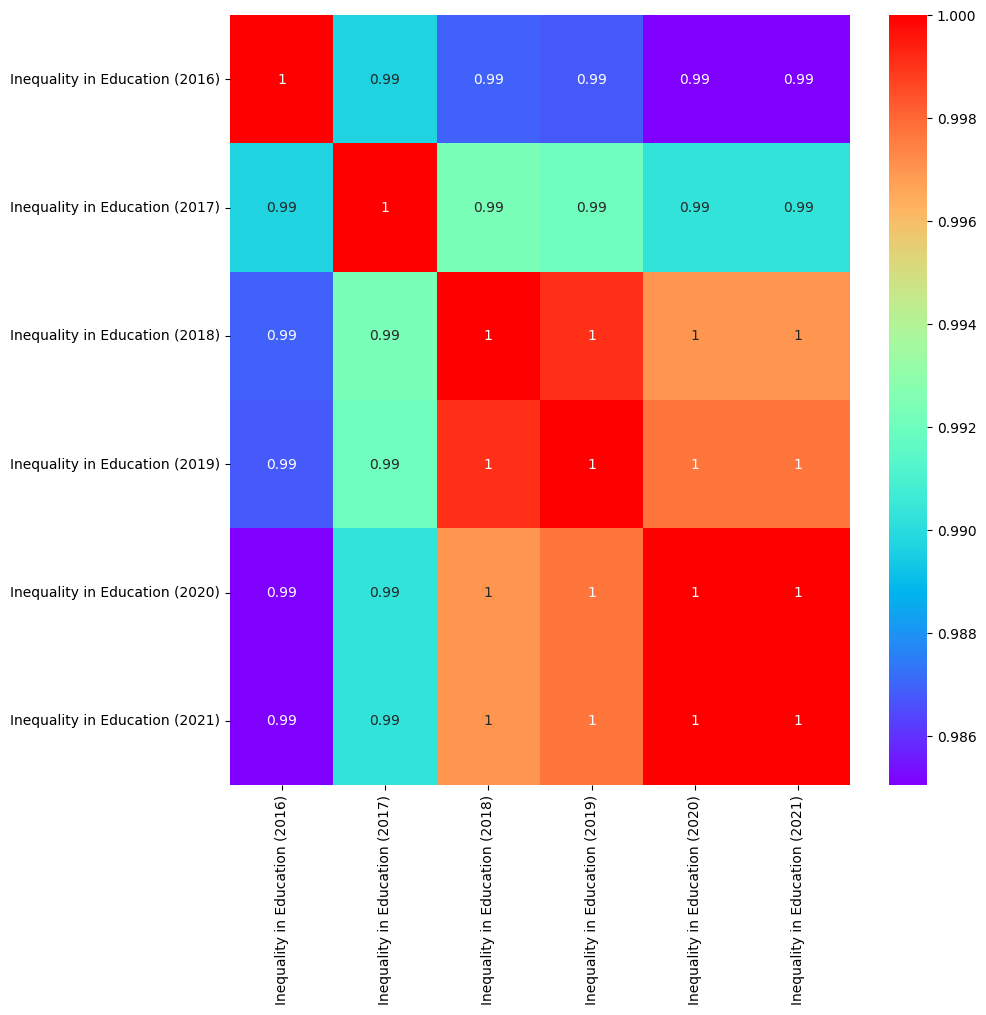

In [17]:
numeric_new_df = data.drop(columns=['Country','Human Development Groups','HDI Rank (2021)'], axis=1)

plt.figure(figsize = (10, 10))
sns.heatmap(numeric_new_df .corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

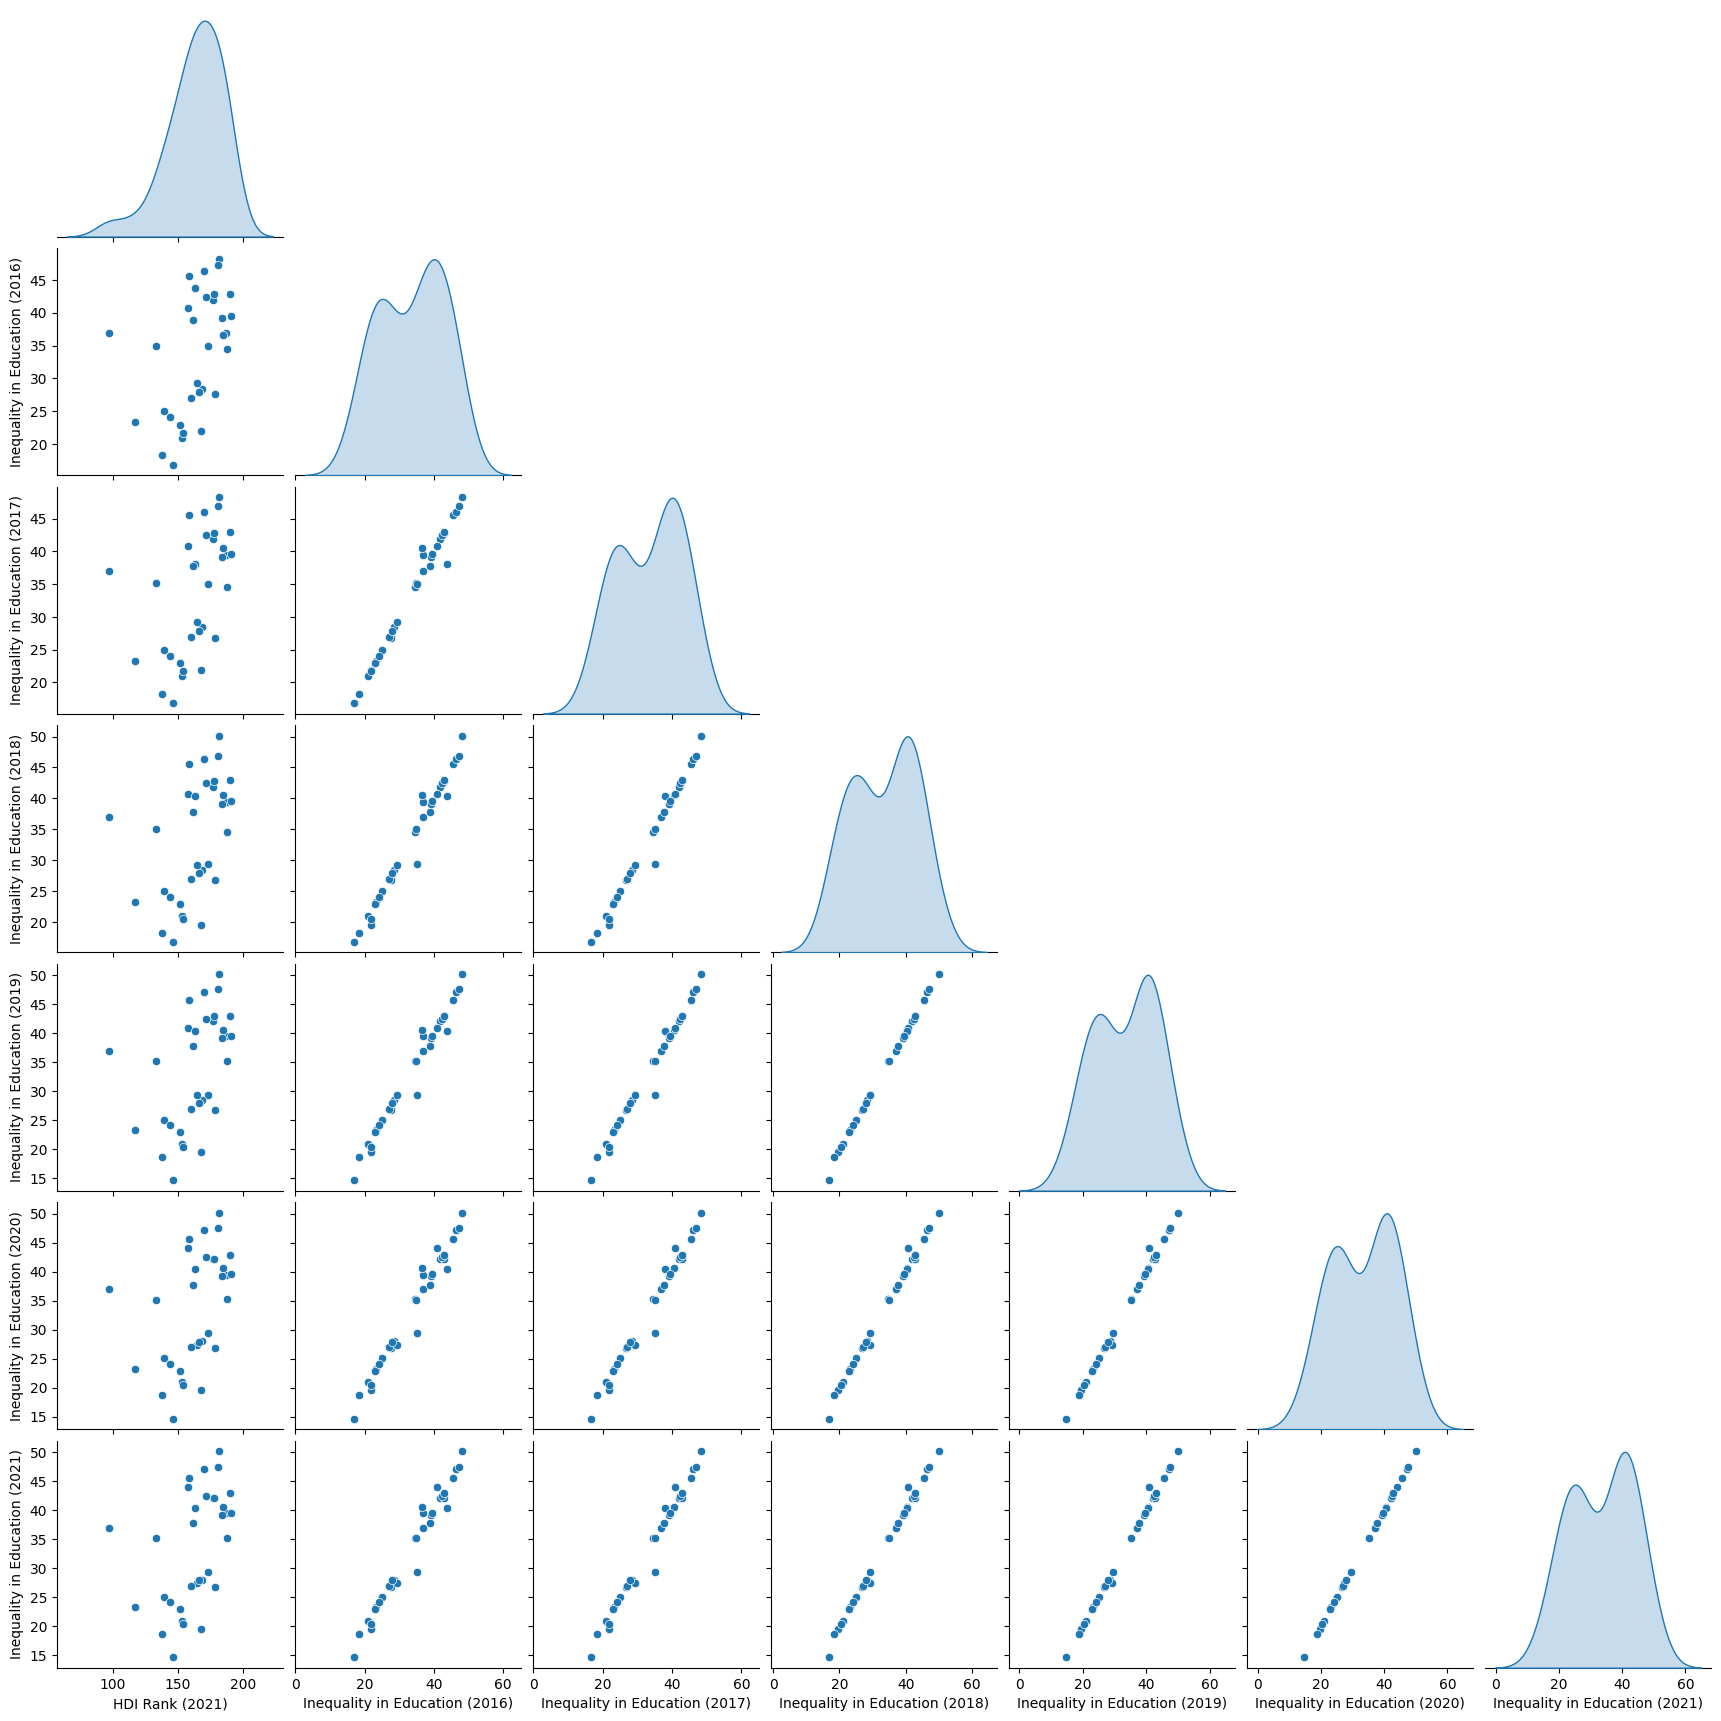

In [18]:
sns.pairplot(data,corner=True,diag_kind="kde")
plt.show()

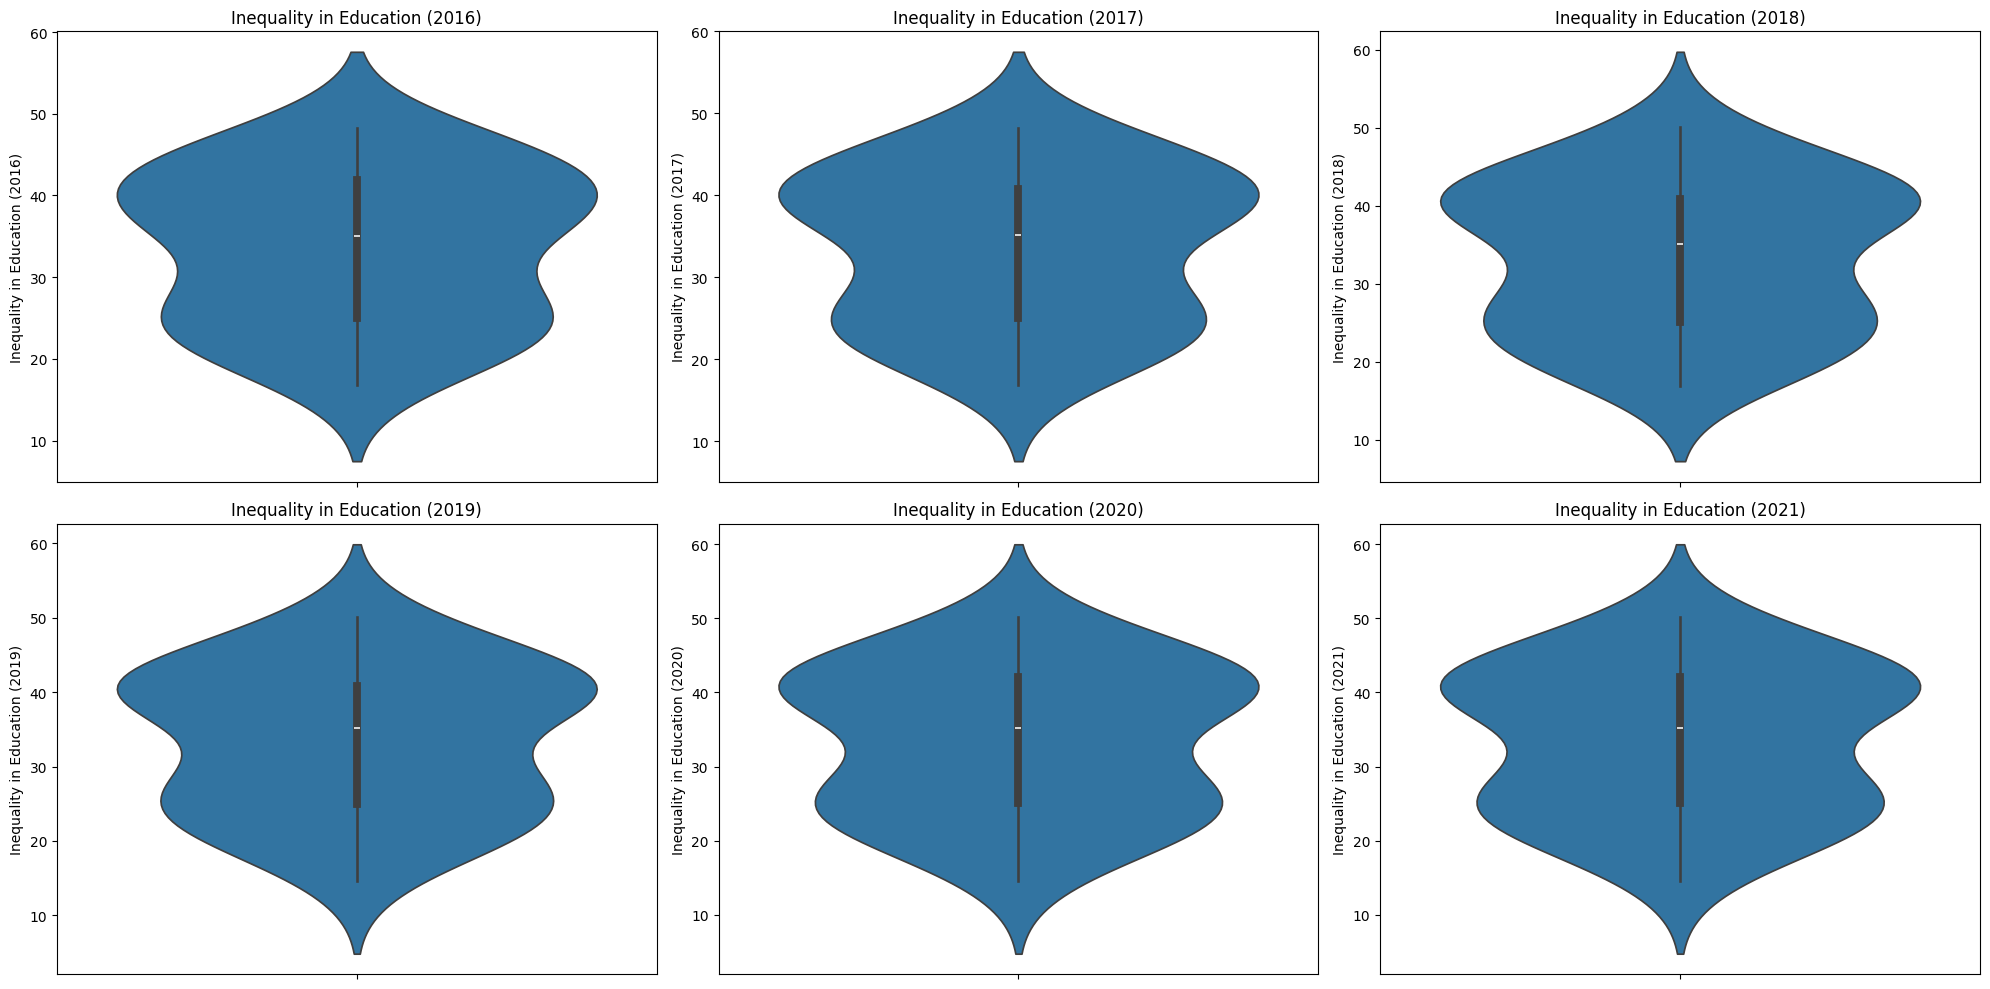

In [19]:

# Assuming 'data' is your DataFrame
inequality_columns = [
    'Inequality in Education (2016)',
    'Inequality in Education (2017)',
    'Inequality in Education (2018)',
    'Inequality in Education (2019)',
    'Inequality in Education (2020)',
    'Inequality in Education (2021)'
]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot violin plots for each inequality column
for i, column in enumerate(inequality_columns):
    sns.violinplot(y=data[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


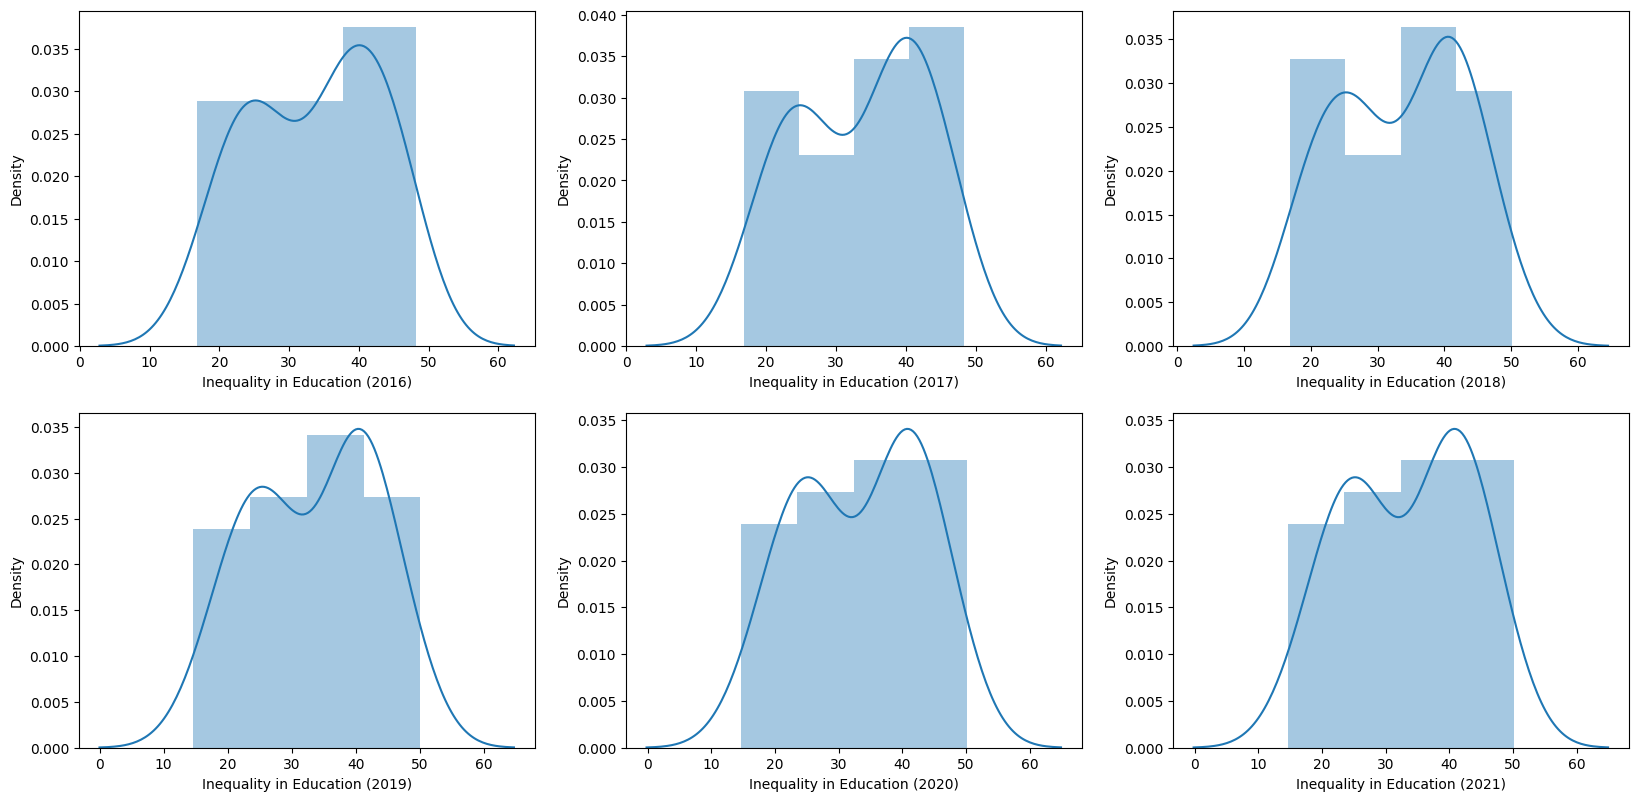

In [20]:
inequality_columns = [
    'Inequality in Education (2016)',
    'Inequality in Education (2017)',
    'Inequality in Education (2018)',
    'Inequality in Education (2019)',
    'Inequality in Education (2020)',
    'Inequality in Education (2021)'
]

plt.figure(figsize = (20,20))
for i in enumerate(inequality_columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(data[i[1]])

In [21]:
data.head()

,Country,Human Development Groups,HDI Rank (2021),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
1,Burundi,Low,187.0,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210
3,Burkina Faso,Low,184.0,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794
4,Botswana,Medium,117.0,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830
5,Central African Republic,Low,188.0,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850
6,Ivory Coast,Medium,159.0,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040


In [22]:
columns_drop = ['Country','HDI Rank (2021)','Human Development Groups']
data.drop(columns=columns_drop, inplace=True)


In [23]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [24]:
data_scaled

array([[ 0.34964419,  0.64427623,  0.63723612,  0.62495824,  0.61779616,
         0.61779616],
       [ 0.5970573 ,  0.60768429,  0.6019091 ,  0.59025167,  0.58346344,
         0.58346344],
       [-1.12216822, -1.12429199, -1.07019584, -1.05248564, -1.04157906,
        -1.04157906],
       [ 0.09857237,  0.10550231,  0.11708666,  0.18102082,  0.17864064,
         0.17864064],
       [ 1.29621123,  1.31202354,  1.28190059,  1.2583003 ,  1.24431616,
         1.24431616],
       [-0.64420166, -0.74326507, -0.70234035, -0.69109089, -0.68407709,
        -0.68407709],
       [-1.37606861, -1.38007544, -1.31713731, -1.29509002, -1.28157021,
        -1.28157021],
       [ 0.35774653,  0.36659866,  0.36915736,  0.36158782,  0.35726265,
         0.35726265],
       [ 0.13920861,  0.16572997,  0.17523235,  0.17106877,  0.16879578,
         0.16879578],
       [ 1.58386703,  1.60181276,  1.75744153,  1.72548918,  1.7064727 ,
         1.7064727 ],
       [ 0.89564031,  0.90848176,  0.89230853,  0.

In [26]:
inequality_columns = [
    'Inequality in Education (2016)',
    'Inequality in Education (2017)',
    'Inequality in Education (2018)',
    'Inequality in Education (2019)',
    'Inequality in Education (2020)',
    'Inequality in Education (2021)'
]
data_df1 = pd.DataFrame(data_scaled, columns = [inequality_columns])

data_df1.head()

,Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,0.349644,0.644276,0.637236,0.624958,0.617796,0.617796
1,0.597057,0.607684,0.601909,0.590252,0.583463,0.583463
2,-1.122168,-1.124292,-1.070196,-1.052486,-1.041579,-1.041579
3,0.098572,0.105502,0.117087,0.181021,0.178641,0.178641
4,1.296211,1.312024,1.281901,1.258300,1.244316,1.244316


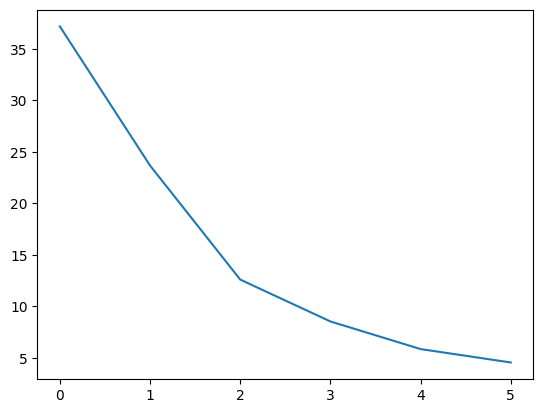

In [27]:
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(data_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

In [30]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(data_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6897431742611195
For n_clusters=3, the silhouette score is 0.5558288460420547
For n_clusters=4, the silhouette score is 0.5028787376753163
For n_clusters=5, the silhouette score is 0.515378765839825
For n_clusters=6, the silhouette score is 0.5016780461545725
For n_clusters=7, the silhouette score is 0.5063920330398499
For n_clusters=8, the silhouette score is 0.5187209367204002


In [35]:

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster.fit(data_df1)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [36]:
cluster.labels_

array([3, 3, 2, 3, 0, 1, 2, 3, 3, 0, 0, 2, 0, 2, 1, 3, 0, 1, 1, 3, 1, 0,
       0, 0, 3, 2, 1, 0, 3, 1, 1, 2, 2])

In [37]:
data['Cluster_Id'] = cluster.labels_
data.head()

,Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),Cluster_Id
1,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210,3
3,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,3
4,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,2
5,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850,3
6,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040,0


In [38]:
data.Cluster_Id.value_counts(ascending=True)

Cluster_Id
2    7
1    8
3    9
0    9
Name: count, dtype: int64

In [39]:
data['Cluster_Id'] = cluster.labels_
data.head()

,Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),Cluster_Id
1,36.868090,39.488210,39.488210,39.488210,39.488210,39.488210,3
3,39.152794,39.152794,39.152794,39.152794,39.152794,39.152794,3
4,23.276830,23.276830,23.276830,23.276830,23.276830,23.276830,2
5,34.549600,34.549600,34.549600,35.197850,35.197850,35.197850,3
6,45.609040,45.609040,45.609040,45.609040,45.609040,45.609040,0


In [40]:
data.Cluster_Id.value_counts(ascending=True)

Cluster_Id
2    7
1    8
3    9
0    9
Name: count, dtype: int64

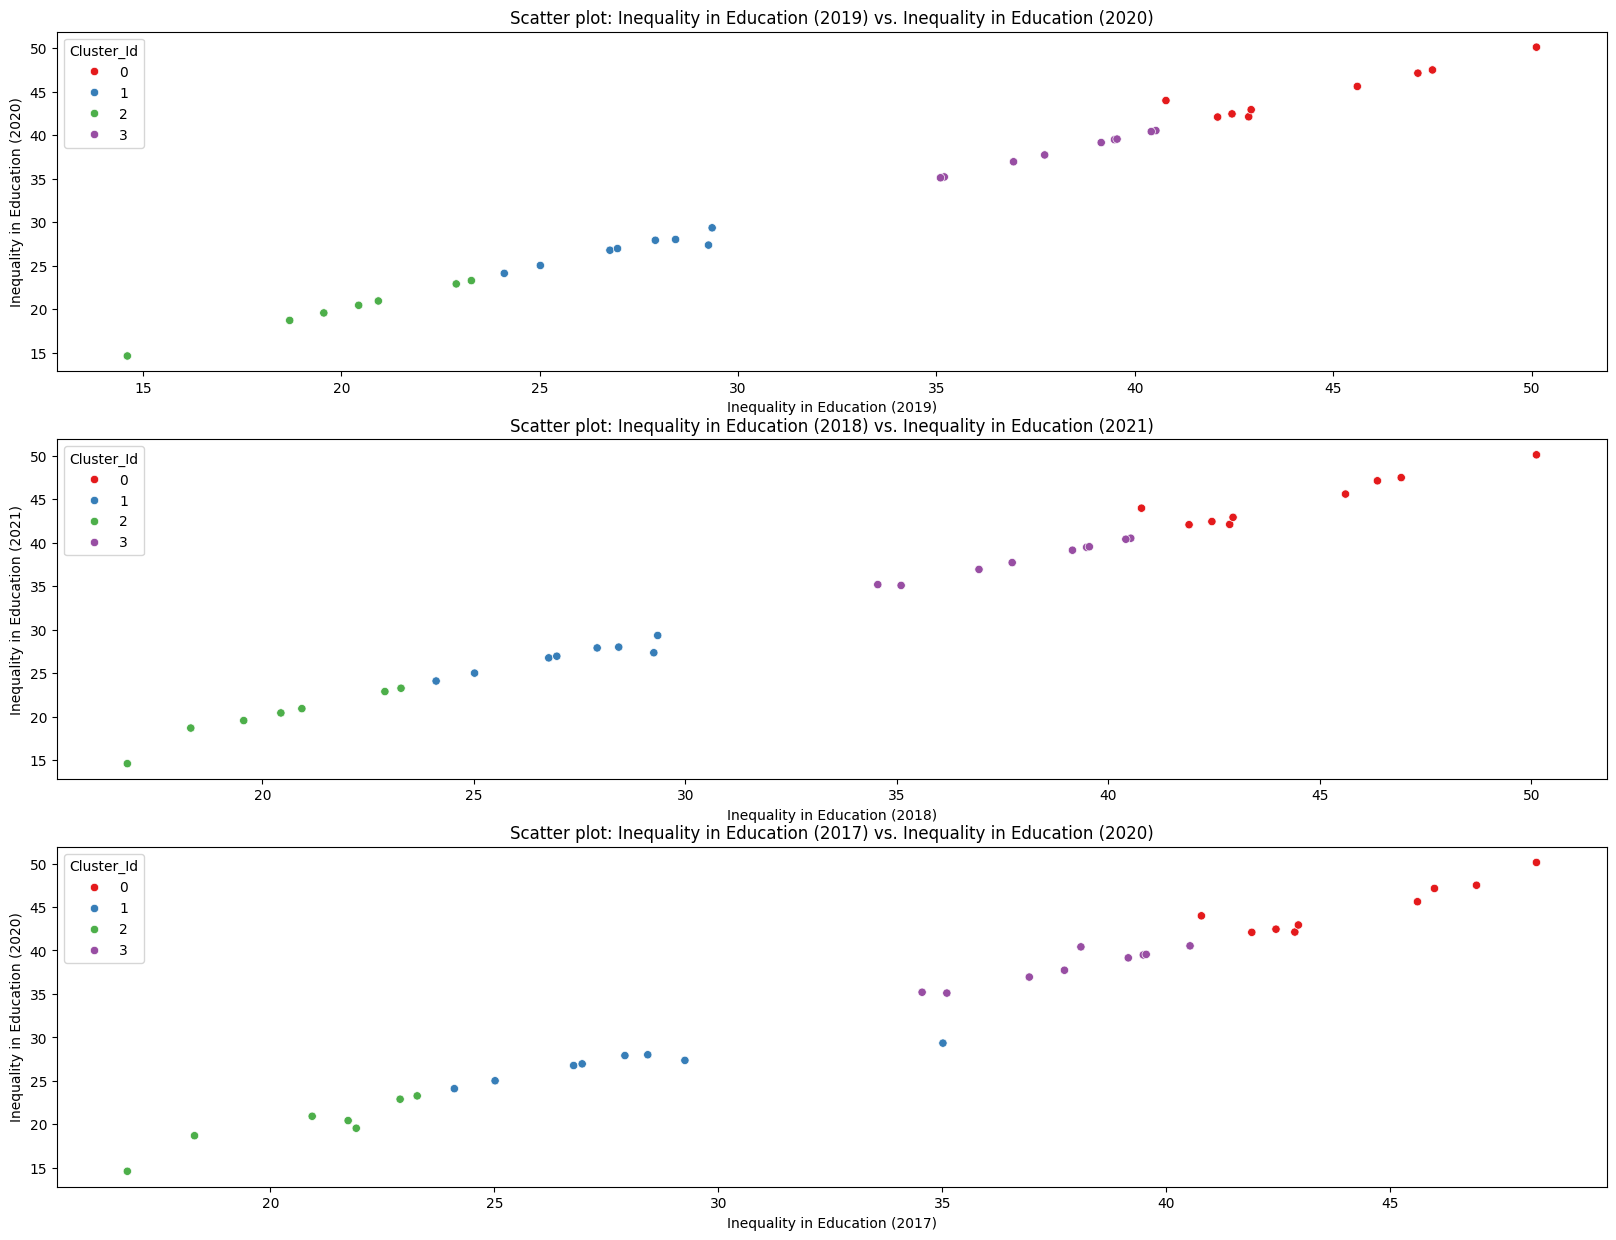

In [41]:
# Scatter plot on Inequality in Education columns and other relevant features
plt.figure(figsize=(20, 15))

# Assuming 'data' is your DataFrame
plt.subplot(3, 1, 1)
sns.scatterplot(x='Inequality in Education (2019)', y='Inequality in Education (2020)', hue='Cluster_Id', data=data, legend='full', palette="Set1")
plt.title('Scatter plot: Inequality in Education (2019) vs. Inequality in Education (2020)')

plt.subplot(3, 1, 2)
sns.scatterplot(x='Inequality in Education (2018)', y='Inequality in Education (2021)', hue='Cluster_Id', data=data, legend='full', palette="Set1")
plt.title('Scatter plot: Inequality in Education (2018) vs. Inequality in Education (2021)')

plt.subplot(3, 1, 3)
sns.scatterplot(x='Inequality in Education (2017)', y='Inequality in Education (2020)', hue='Cluster_Id', data=data, legend='full', palette="Set1")
plt.title('Scatter plot: Inequality in Education (2017) vs. Inequality in Education (2020)')

plt.show()


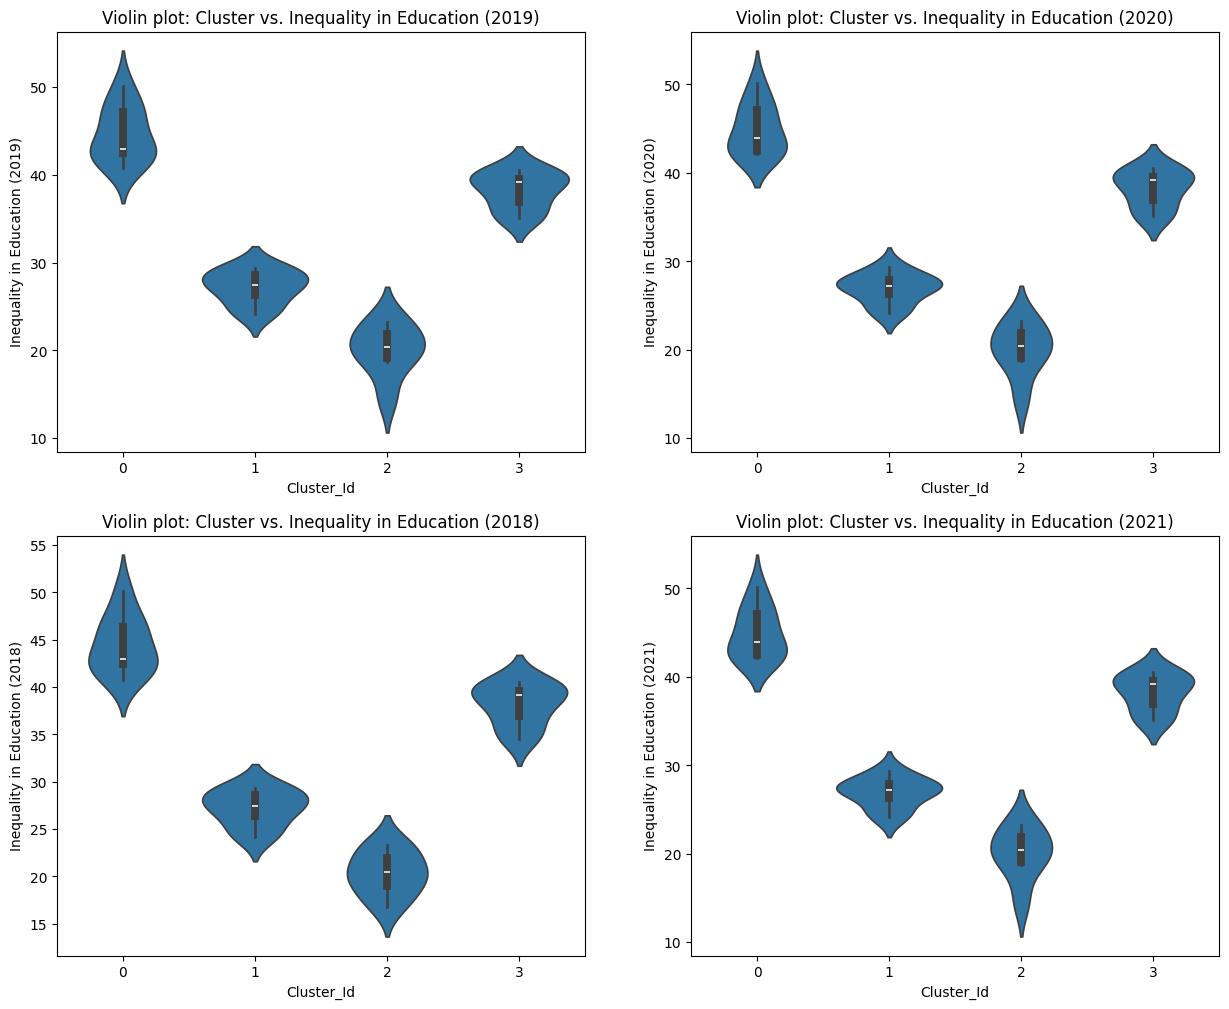

In [42]:
# Violin plot on Inequality in Education columns and other relevant features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Assuming 'data' is your DataFrame
sns.violinplot(x='Cluster_Id', y='Inequality in Education (2019)', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Violin plot: Cluster vs. Inequality in Education (2019)')

sns.violinplot(x='Cluster_Id', y='Inequality in Education (2020)', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Violin plot: Cluster vs. Inequality in Education (2020)')

sns.violinplot(x='Cluster_Id', y='Inequality in Education (2018)', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Violin plot: Cluster vs. Inequality in Education (2018)')

sns.violinplot(x='Cluster_Id', y='Inequality in Education (2021)', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Violin plot: Cluster vs. Inequality in Education (2021)')

plt.show()


In [43]:

cluster_means = data[['Inequality in Education (2019)', 'Inequality in Education (2020)', 'Inequality in Education (2018)', 'Inequality in Education (2021)', 'Cluster_Id']].groupby('Cluster_Id').mean()
cluster_means


,Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2018),Inequality in Education (2021)
Cluster_Id,,,,
0,44.610840,44.883118,44.443382,44.883118
1,27.223771,26.934800,27.223771,26.934800
2,20.057066,20.057066,20.315500,20.057066
3,38.234461,38.234461,38.162433,38.234461
